In [36]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("stats.csv")

In [38]:
df.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,engENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,brBRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,engENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,engENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin degaard,Arsenal,noNOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38


In [39]:
df.isnull().sum()

Player         0
Team           0
Nation         3
Pos            0
Age            4
MP             0
Starts         0
Min          145
90s          144
Gls          144
Ast          144
G-PK         144
PK           144
PKatt        144
CrdY         144
CrdR         144
Gls.1        145
Ast.1        145
G+A          145
G-PK.1       145
G+A-PK       145
xG           145
npxG         145
xA           145
npxG+xA      145
xG.1         145
xA.1         145
xG+xA        145
npxG.1       145
npxG+xA.1    145
dtype: int64

In [40]:
df.columns

Index(['Player', 'Team', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s',
       'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG.1',
       'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1'],
      dtype='object')

In [41]:
df['PKatt']

0      2.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
686    NaN
687    NaN
688    NaN
689    NaN
690    NaN
Name: PKatt, Length: 691, dtype: float64

In [42]:
#'MP', 'Starts', '90s', 'G-PK', 'PK', 'PKatt', 'G+A', 'G+A-PK', 'npxG', 'npxG+xA', 'xG+xA'
df.drop('MP',axis=1, inplace=True)
df.drop('Starts',axis=1, inplace=True)
df.drop('90s',axis=1, inplace=True)
df.drop('G-PK',axis=1, inplace=True)
df.drop('PK',axis=1, inplace=True)
df.drop('PKatt',axis=1, inplace=True)
df.drop('G+A',axis=1, inplace=True)
df.drop('G+A-PK',axis=1, inplace=True)
df.drop('xG',axis=1, inplace=True)
df.drop('npxG',axis=1, inplace=True)
df.drop('xA',axis=1, inplace=True)
df.drop('npxG+xA',axis=1, inplace=True)
df.drop('xG+xA',axis=1, inplace=True)

In [43]:
df.columns

Index(['Player', 'Team', 'Nation', 'Pos', 'Age', 'Min', 'Gls', 'Ast', 'CrdY',
       'CrdR', 'Gls.1', 'Ast.1', 'G-PK.1', 'xG.1', 'xA.1', 'npxG.1',
       'npxG+xA.1'],
      dtype='object')

In [44]:
df.drop('Gls',axis=1, inplace=True)
df.drop('Ast',axis=1, inplace=True)

In [45]:
df.columns

Index(['Player', 'Team', 'Nation', 'Pos', 'Age', 'Min', 'CrdY', 'CrdR',
       'Gls.1', 'Ast.1', 'G-PK.1', 'xG.1', 'xA.1', 'npxG.1', 'npxG+xA.1'],
      dtype='object')

In [46]:
df = df[df.Pos != 'GK']

In [47]:
df.head()

,Player,Team,Nation,Pos,Age,Min,CrdY,CrdR,Gls.1,Ast.1,G-PK.1,xG.1,xA.1,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,engENG,"FW,MF",19.0,"2,978",6.0,0.0,0.33,0.21,0.27,0.29,0.21,0.25,0.46
1,Gabriel Dos Santos,Arsenal,brBRA,DF,23.0,"3,063",8.0,1.0,0.15,0.00,0.15,0.08,0.02,0.08,0.10
3,Ben White,Arsenal,engENG,DF,23.0,"2,880",3.0,0.0,0.00,0.00,0.00,0.03,0.02,0.03,0.05
4,Martin degaard,Arsenal,noNOR,MF,22.0,"2,785",4.0,0.0,0.23,0.13,0.23,0.16,0.22,0.16,0.38
5,Granit Xhaka,Arsenal,chSUI,"MF,DF",28.0,"2,327",10.0,1.0,0.04,0.08,0.04,0.05,0.09,0.05,0.14


In [51]:
df

,Player,Team,Nation,Pos,Age,Min,CrdY,CrdR,Gls.1,Ast.1,G-PK.1,xG.1,xA.1,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,engENG,"FW,MF",19.0,"2,978",6.0,0.0,0.33,0.21,0.27,0.29,0.21,0.25,0.46
1,Gabriel Dos Santos,Arsenal,brBRA,DF,23.0,"3,063",8.0,1.0,0.15,0.00,0.15,0.08,0.02,0.08,0.10
3,Ben White,Arsenal,engENG,DF,23.0,"2,880",3.0,0.0,0.00,0.00,0.00,0.03,0.02,0.03,0.05
4,Martin degaard,Arsenal,noNOR,MF,22.0,"2,785",4.0,0.0,0.23,0.13,0.23,0.16,0.22,0.16,0.38
5,Granit Xhaka,Arsenal,chSUI,"MF,DF",28.0,"2,327",10.0,1.0,0.04,0.08,0.04,0.05,0.09,0.05,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,Ki-Jana Hoever,Wolverhampton Wanderers,nlNED,DF,19.0,308,1.0,0.0,0.00,0.00,0.00,0.01,0.01,0.01,0.02
678,Luke Cundle,Wolverhampton Wanderers,engENG,MF,19.0,180,0.0,0.0,0.00,0.00,0.00,0.00,0.12,0.00,0.12
679,Chiquinho,Wolverhampton Wanderers,ptPOR,"DF,MF",21.0,208,0.0,0.0,0.00,1.30,0.00,0.13,0.27,0.13,0.41
681,Chem Campbell,Wolverhampton Wanderers,wlsWAL,MF,18.0,13,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [52]:
for i in range(683):
    try:
        df.Pos[i] = df.Pos[i][:1]
    except:
        pass

df

C:\Users\xavim\AppData\Local\Temp/ipykernel_19704/864689313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Pos[i] = df.Pos[i][:1]


,Player,Team,Nation,Pos,Age,Min,CrdY,CrdR,Gls.1,Ast.1,G-PK.1,xG.1,xA.1,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,engENG,F,19.0,"2,978",6.0,0.0,0.33,0.21,0.27,0.29,0.21,0.25,0.46
1,Gabriel Dos Santos,Arsenal,brBRA,D,23.0,"3,063",8.0,1.0,0.15,0.00,0.15,0.08,0.02,0.08,0.10
3,Ben White,Arsenal,engENG,D,23.0,"2,880",3.0,0.0,0.00,0.00,0.00,0.03,0.02,0.03,0.05
4,Martin degaard,Arsenal,noNOR,M,22.0,"2,785",4.0,0.0,0.23,0.13,0.23,0.16,0.22,0.16,0.38
5,Granit Xhaka,Arsenal,chSUI,M,28.0,"2,327",10.0,1.0,0.04,0.08,0.04,0.05,0.09,0.05,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,Ki-Jana Hoever,Wolverhampton Wanderers,nlNED,D,19.0,308,1.0,0.0,0.00,0.00,0.00,0.01,0.01,0.01,0.02
678,Luke Cundle,Wolverhampton Wanderers,engENG,M,19.0,180,0.0,0.0,0.00,0.00,0.00,0.00,0.12,0.00,0.12
679,Chiquinho,Wolverhampton Wanderers,ptPOR,D,21.0,208,0.0,0.0,0.00,1.30,0.00,0.13,0.27,0.13,0.41
681,Chem Campbell,Wolverhampton Wanderers,wlsWAL,M,18.0,13,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [65]:

df['xG.1'].unique()

array([0.29, 0.08, 0.03, 0.16, 0.05, 0.11, 0.27, 0.35, 0.4 , 0.04, 0.5 ,
       0.02, 0.38, 0.01, 0.15, 0.  , 0.07, 0.37, 0.14, 0.25, 0.19, 0.17,
       0.13, 0.51, 0.09, 0.3 , 0.06, 0.1 , 0.26, 0.22, 0.28, 0.45, 0.34,
       0.2 , 0.23, 0.12, 0.48, 0.39, 0.53, 0.6 , 0.18, 0.31, 0.43, 0.42,
       0.36, 1.03, 0.63, 0.47, 0.71, 0.61, 0.46, 0.88, 1.08, 4.48, 0.21,
       0.49, 0.74, 0.32, 0.56, 0.24, 1.16, 1.45, 0.41, 1.22])

In [69]:
#'Player', 'Team', 'Nation', 'Pos', 'Age', 'Min', 'CrdY', 'CrdR','Gls.1', 'Ast.1', 'G-PK.1', 'xG.1', 'xA.1', 'npxG.1', 'npxG+xA.1'
df['Age'] = df['Age'].astype('int')
df['Min'] = (df['Min'].str.replace(",", "")).astype('int')
df['CrdY'] = df['CrdY'].astype('int')
df['CrdR'] = df['CrdR'].astype('int')
df['Gls.1'] = df['Gls.1'].astype('float')
df['Ast.1'] = df['Ast.1'].astype('float')
df['G-PK.1'] = df['G-PK.1'].astype('float')
df['xG.1'] = df['xG.1'].astype('float')
df['xA.1'] = df['xA.1'].astype('float')
df['npxG.1'] = df['npxG.1'].astype('float')
df['npxG+xA.1'] = df['npxG+xA.1'].astype('float')
df = df[df.Min >= 270]

In [70]:
df

,Player,Team,Nation,Pos,Age,Min,CrdY,CrdR,Gls.1,Ast.1,G-PK.1,xG.1,xA.1,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,engENG,F,19,2978,6,0,0.33,0.21,0.27,0.29,0.21,0.25,0.46
1,Gabriel Dos Santos,Arsenal,brBRA,D,23,3063,8,1,0.15,0.00,0.15,0.08,0.02,0.08,0.10
3,Ben White,Arsenal,engENG,D,23,2880,3,0,0.00,0.00,0.00,0.03,0.02,0.03,0.05
4,Martin degaard,Arsenal,noNOR,M,22,2785,4,0,0.23,0.13,0.23,0.16,0.22,0.16,0.38
5,Granit Xhaka,Arsenal,chSUI,M,28,2327,10,1,0.04,0.08,0.04,0.05,0.09,0.05,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Willy Boly,Wolverhampton Wanderers,ciCIV,D,30,900,1,0,0.00,0.00,0.00,0.02,0.01,0.02,0.03
674,Fbio Silva,Wolverhampton Wanderers,ptPOR,F,19,572,0,0,0.00,0.00,0.00,0.36,0.02,0.36,0.38
675,Pedro Neto,Wolverhampton Wanderers,ptPOR,F,21,466,3,0,0.19,0.19,0.19,0.29,0.22,0.29,0.51
676,Toti Gomes,Wolverhampton Wanderers,ptPOR,D,22,360,1,0,0.00,0.00,0.00,0.01,0.00,0.01,0.01


<AxesSubplot:xlabel='Team'>

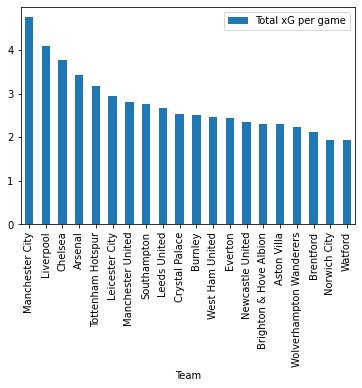

In [71]:
# which team had the most xg.1 per game

group_team = df.groupby(by=['Team'])

team_xg = group_team.sum()

team_xg = team_xg.sort_values(by='xG.1', ascending = False)

team_xg = pd.DataFrame({'Total xG per game': team_xg['xG.1']})

team_xg.rename(columns={'Team': 'Total xG per game'}, inplace=True)

team_xg.plot(kind='bar')

I want to compare this to the actual final results.
Below ive written a table with the teams final position 1st and xg position 2nd:

1		
Manchester City
Manchester City 0

2		
Liverpool
Liverpool 0
	
3		
Chelsea
Chelsea 0
	
4		
Tottenham Hotspur
Arsenal 1
	
5		
Arsenal
Tottenham Hotspur 1
	
6		
Manchester United
Leicester City 2
	
7		
West Ham United
Manchester United 1
	
8		
Leicester City
Southampton 7
	
9		
Brighton & Hove Albion
Leeds United 8
	
10		
Wolverhampton Wanderers
Crystal Palace 2
	
11		
Newcastle United
Burnley 7
	
12		
Crystal Palace
West Ham United 5
	
13		
Brentford
Everton 3
	
14		
Aston Villa
Newcastle United 3
	
15		
Southampton
Brighton & Hove Albion 6
	
16		
Everton
Aston Villa 2
	
17		
Leeds United
Wolverhampton Wanderers 7
	
18		
Burnley
Brentford 5
	
19		
Watford
Norwich City 1
	
20		
Norwich City
Watford 1

The results here are very interesting, in the top 7 places and the last 2 places xg determines the position of the teams very accurately but in the middle to the end it seems to not really have an effect. This is because the teams conceded a lot or little xg which meant that there position was drastically different to what there xg position was. As well as this, the xg for the middle is very similar and this could also effect the standings. Overall though xg is a fairly accurate standard to reflect the standings especially at the very top and bottom. According to the graph the more xg you get the more likely you will finish better and the less you get the less likely you will not get relegated. Now i will compare the xg.1 to g.1 to see if that had an effect on the standings

<AxesSubplot:xlabel='Team'>

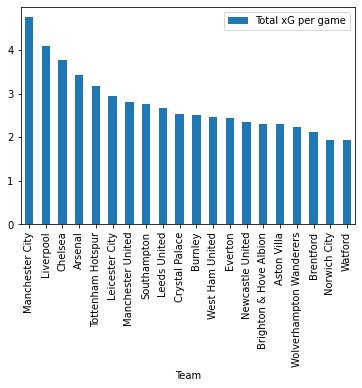

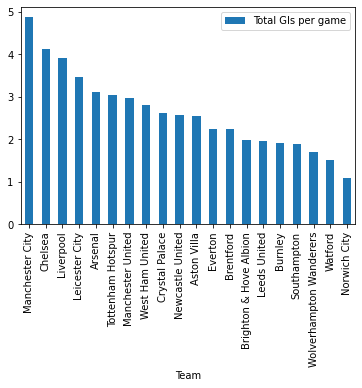

In [73]:
# compare xg.1 to g.1

team_xg.plot(kind='bar')

group_team = df.groupby(by=['Team'])

team_g = group_team.sum()

team_g = team_g.sort_values(by='Gls.1', ascending = False)

team_g = pd.DataFrame({'Total Gls per game': team_g['Gls.1']})

team_g.rename(columns={'Team': 'Total Gls per game'}, inplace=True)

team_g.plot(kind='bar')

While the top 6 order isnt as accurate as xg the middle of the pack are much more accurate with fewer outliers. The noteable differences between this one and the xg one is burnley who scored a lot less than was expected which is a reason why they finished so poorly, while southampton did very well in the xg one they did very badly in the goals one meaniang they severely underperformed and this had an effect on their final standing.

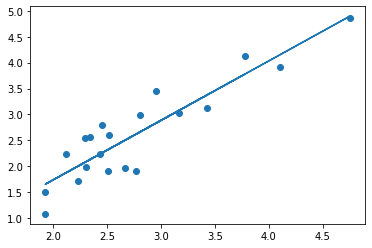

In [74]:
# did difference in xg to gls have an effect on final standings

group_team = df.groupby(by=['Team'])

team_per = group_team.sum()

team_per = pd.DataFrame({'Gls.1': team_per['Gls.1'],                    
                      'xG.1': team_per['xG.1']})

x =team_per['xG.1']
y =team_per['Gls.1']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)


In [78]:
team_per['dif'] = team_per['Gls.1'] - team_per['xG.1']
team_per = team_per.sort_values(by='dif', ascending = False)
team_per

,Gls.1,xG.1,dif
Team,,,
Leicester City,3.46,2.95,0.51
West Ham United,2.80,2.45,0.35
Chelsea,4.12,3.78,0.34
Aston Villa,2.54,2.30,0.24
Newcastle United,2.57,2.34,0.23
Manchester United,2.98,2.81,0.17
Manchester City,4.87,4.75,0.12
Brentford,2.23,2.12,0.11
Crystal Palace,2.61,2.52,0.09


while this doesnt accurately represent the table it fairly accurately explains the differences between underperforming and overperforming teams. the difference between the 2 tables for west ham burnley aston villa newcastle leeds southampton and brighton can all be explained using the difference between xg and gls per game.

<AxesSubplot:xlabel='Nation'>

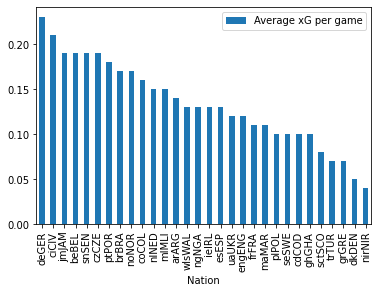

In [94]:
# which nation had the highest average xg.1 per game

group_nation = df.groupby(by=['Nation'])

nation_xg = round(group_nation.mean(),2)

nation_xg['number'] = group_nation['Nation'].count()

nation_xg = nation_xg[nation_xg['number'] >= 3]

nation_xg = nation_xg.sort_values(by='xG.1', ascending = False)

nation_xg = pd.DataFrame({'Average xG per game': nation_xg['xG.1']})

nation_xg.rename(columns={'Nation': 'Average xG per game'}, inplace=True)

nation_xg.plot(kind='bar')

After selecting the nations with more than 3 players, the graph shows that players from germany have the most xg per game while northern ireland have the least. even though nations like ivory coast, jamaica and the czech republic are higher up the lis than brazil this doesnt mean that they are better at football. This is probably due to them having less players or a higher percentage of players in attacking positions as defenders should get less xg per game than forwards. Lets make sure this is true in the next test.

<AxesSubplot:xlabel='Pos'>

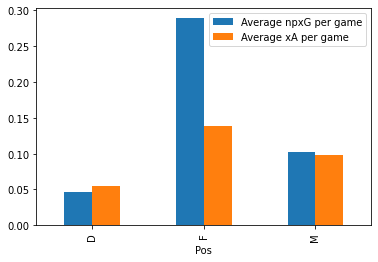

In [101]:
# see which positions have the highest npxg and xa

group_position = df.groupby(by=['Pos'])

position = round(group_position.mean(),3)

position = pd.DataFrame({'Average npxG per game': position['npxG.1'],
                        'Average xA per game': position['xA.1']})

position.plot(kind='bar')

This fits my prediction that forwards have the most xg per game with more than double the xg of midfielders and 6 times the number as defenders.

<AxesSubplot:xlabel='Team'>

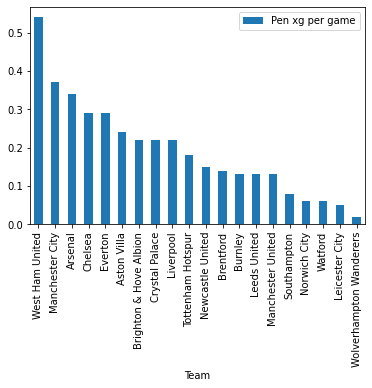

In [110]:
# which team had the most penalties

group_team = df.groupby(by=['Team'])

team_pen = group_team.sum()

team_pen['pen'] = team_pen['xG.1'] - team_pen['npxG.1']

team_pen = team_pen.sort_values(by='pen', ascending = False)

team_pen = pd.DataFrame({'Pen xg per game': team_pen['pen']})

team_pen.rename(columns={'Team': 'Pen xg per game'}, inplace=True)

team_pen.plot(kind='bar')

West Ham got by far the most penalties which could be a factor in how they overperform so much however wolverhampton have the least penalties and they also overachieved so i dont think that thats a good measure for under/overperforming.

<AxesSubplot:xlabel='Team'>

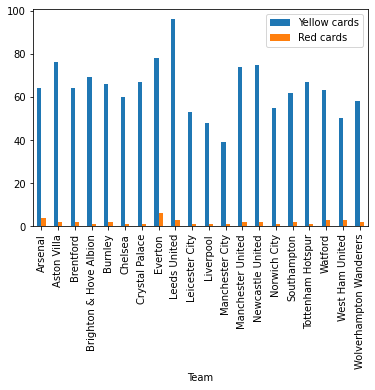

In [115]:
# which team had the most cards
group_team = df.groupby(by=['Team'])

team_card = group_team.sum()

team_card = pd.DataFrame({'Yellow cards': team_card['CrdY'],
                         'Red cards': team_card['CrdR']})

team_card.plot(kind='bar')

There is no relationship between cards and goals as even though man city have the least, norwich who were last have one of the least. It does reflect better on style of play but we cant measure that with this data. leeds have the most yellow cards whilw everton have the most red.

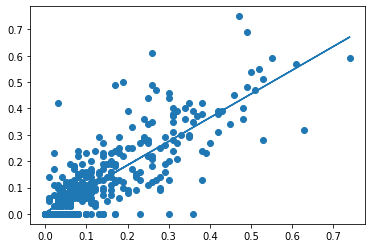

In [117]:
# do people who score more have more goals per game than xg per game
players_xg = pd.DataFrame({'G-PK.1': df['G-PK.1'],                    
                      'npxG.1': df['npxG.1']})

x =players_xg['npxG.1']
y =players_xg['G-PK.1']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)

As i expected the players who score the most outperform more with only 1 player underperforming from those who score more than 0.5 a game. The player who has the most npxg per game actually underperforms massively with an npxg of around 0.75 while they score less than 0.6 a game. The worst finisher though has to be the player who scores 0 goals a game yet gets 0.36 xg a game.  